In [ ]:
import pandas as pd
import numpy as np

In [ ]:
columns = ['account_id', 'name', 'point', 'call_count', 'total_call_time', 'total_exclusive_time', 'min_call_time', 'max_call_time', 'sum_of_squares', 'instances', 'language', 'app_name', 'app_id', 'scope', 'host', 'display_host', 'pid', 'agent_version', 'labels']
data = pd.read_csv('metrics_collector.tsv',
                   sep='\t',
                   header=0,
                   names=columns)
data.head()

C:\Users\Artur\AppData\Local\Temp\ipykernel_2236\3948894926.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('metrics_collector.tsv',


,account_id,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,language,app_name,app_id,scope,host,display_host,pid,agent_version,labels
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
2,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
3,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
4,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}


# Анализ данных

## Работа с признаками

По умолчанию для работы нам даны 19 признаков:

* account_id;
* name;
* point;
* call_count;
* total_call_time;
* total_exclusive_time;
* min_call_time;
* max_call_time;
* sum_of_squares;
* instances;
* language;
* app_name;
* app_id;
* scope;
* host;
* display_host;
* pid;
* agent_version;
* labels,

однако среди них есть те, которые не представляют интереса для создания ML-модели, или предсказания выбросов, ввиду отсутствия различий в значениях для разных элементов столбца.

Для того чтобы получить информацию по уникальным значениям для каждого столбца, а также по количеству данных уникальных значений, воспользуемся методом .value_counts(), тем самым мы сможем понять, какие признаки являются неинформативными, что позволит понизить размерность данных, без потери качества.




In [ ]:
# выведем дополнительную информацию о размерности данных
print('Размерность данных составляет {:,} строк и {:,} столбцов'.format(*list(data.shape)))

Размерность данных составляет 18,363,749 строк и 19 столбцов


Рассмотрим признак __account_id__ содержащий информацию об идентефикаторе аккаунта, с которого происходит выгрузка данных.

Для всех предоставленных данных - 18 363 749 значениям, в данной колонке соответствует единственное значение - ***1***. Следовательно можно отнести признак к неинформативным.

In [ ]:
data['account_id'].value_counts()

account_id
1    18363749
Name: count, dtype: int64

Признак **language** с информацией о языке программирования также содержит единственное значение - ***java***, которое также не добавляет данным никакой информативности.

In [ ]:
data['language'].value_counts()

language
java    18363749
Name: count, dtype: int64

Для признака **app_name** характерно наличие одного значения - **[GMonit] Collector**, которое используется для выбора данных для подсчета метрик. Однако в нашем случае, ввиду того, что данные являются неинформативными мы также избавляемся от данного признкака, как от ненужного.


In [ ]:
data['app_name'].value_counts()

app_name
[GMonit] Collector    18363749
Name: count, dtype: int64

Столбец **app_id** аналогично не содержит полезной информации, т.к. имеет единственное значение - ***17592186045423***. Из чего следует, что его также нужно подвергунть удалению.


In [ ]:
data['app_id'].value_counts()

app_id
17592186045423    18363749
Name: count, dtype: int64

Среди оставшихся признаков у нас имеется еще два неинформативных признака - **pid** и **labels**, содержащие также по 1 значению - ***1*** и ***{}*** соответственно. Следовательно нам нужно избавиться и от этих признаков тоже.

In [ ]:
print(data['pid'].value_counts(), data['labels'].value_counts(), sep='\n\n')

pid
1    18363749
Name: count, dtype: int64

labels
{}    18363749
Name: count, dtype: int64


In [ ]:
# преобразуем данные
data = data.drop(['account_id', 'language', 'app_name', 'app_id', 'pid', 'labels'], axis=1)
data.head()

,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,scope,host,display_host,agent_version
0,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
2,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
3,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
4,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0


In [ ]:
# переведем время и дату в формат datetime
data['point'] = pd.to_datetime(data['point'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363749 entries, 0 to 18363748
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   name                  object        
 1   point                 datetime64[ns]
 2   call_count            float64       
 3   total_call_time       float64       
 4   total_exclusive_time  float64       
 5   min_call_time         float64       
 6   max_call_time         float64       
 7   sum_of_squares        float64       
 8   instances             float64       
 9   scope                 object        
 10  host                  object        
 11  display_host          object        
 12  agent_version         object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 1.8+ GB


## Рассчет метрик на данных

### Web Response

Рассчитаем метрику Web Response на наших данных, с учетом условий для их рассчета

> Web Response - время ответа сервиса на внешний http-запрос

Нам доступен код SQL-запроса:

```sql
select
 point as time,
 sumOrNull(total_call_time) / sumOrNull(call_count) as " "
from metrics_collector
where
 language = 'java'
 and app_name = '[GMonit] Collector'
 and scope = ''
 and name = 'HttpDispatcher'
group by time
order by time
```

После выполнения этого запроса нам необходимо получить время, а также значение метрики в виде суммы значений переменной **total_call_time** разделенной на сумму значений переменной **call_count**


Также в запросе присутствует упорядочивание данных по дане в порядке возрастания, помимо этого данные следует выбирать по следующим условиям:

```sql
where
 language = 'java'
 and app_name = '[GMonit] Collector'
 and scope = ''
 and name = 'HttpDispatcher'
```

После очистки данных мы автоматически учитываем условия переменных **language**, **app_name**. Осталось учесть данные для двух последних условий и получить результат

In [ ]:
mask1 = data['scope'].isna()
mask2 = data['name'] == 'HttpDispatcher'
web_response = data[mask1 | mask2]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
web_response.head()

,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,scope,host,display_host,agent_version
0,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
2,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
3,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0
4,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,575f5ba20b4b,575f5ba20b4b,8.5.0


In [ ]:
web_response['web_response'] = web_response['total_call_time'] / web_response['call_count']
web_response['web_response'] = web_response['web_response'].fillna(0)

In [ ]:
web_response.to_csv('web_response.csv', index=False)

In [ ]:
result = web_response.groupby('point')['web_response'].sum()

In [ ]:
result = result.apply(lambda x: round(x, 3))

In [ ]:
result.to_csv('web_response.csv', index=True)

In [ ]:
# метрика Throughput
web_response['call_count'] = web_response['call_count'].fillna(0)

In [ ]:
result2 = web_response.groupby('point')['call_count'].sum()
result2 = result2.apply(lambda x: round(x, 3))
result2.to_csv('throughput.csv', index=True)


APDEX - сводный синтетический показатель “здоровья” сервиса. Изменяется от 0 до 1. Чем ближе к 1, тем лучше.

```sql
with
 sumOrNull(call_count) as s,
 sumOrNull(total_call_time) as t,
 sumOrNull(total_exclusive_time) as f
select
 point as time,
 (s + t/2) / (s + t + f) as " "
from metrics_collector
where
 language = 'java'
 and app_name = '[GMonit] Collector'
 and scope = ''
 and name = 'Apdex'
group by time
order by time

```

In [ ]:
mask3 = data['scope'].isna()
mask4 = data['name'] == 'Apdex'
data3 = data[mask3 | mask4]

In [ ]:
data3['call_count'] = data3['call_count'].fillna(0)
data3['total_call_time'] = data3['total_call_time'].fillna(0)
data3['total_exclusive_time'] = data3['total_exclusive_time'].fillna(0)

In [ ]:
data3['apdex'] = (data3['call_count'] + data3['total_call_time']/2) / (data3['call_count'] + data3['total_call_time'] + data3['total_exclusive_time'])

In [ ]:
result3 = data3.groupby('point')['apdex'].sum()
result3 = result3.apply(lambda x: round(x, 3))
result3.to_csv('apdex.csv', index=True)

Error - процент ошибок в обработанных запросах.
```sql
select
 point as time,
 sumOrNullIf(call_count, name='Errors/allWeb') / sumOrNullIf(call_count, name='HttpDispatcher') as " "
from metrics_collector
where
 language = 'java'
 and app_name = '[GMonit] Collector'
 and scope = ''
 and name in ('HttpDispatcher', 'Errors/allWeb')
group by time
order by time
```

In [2]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: >

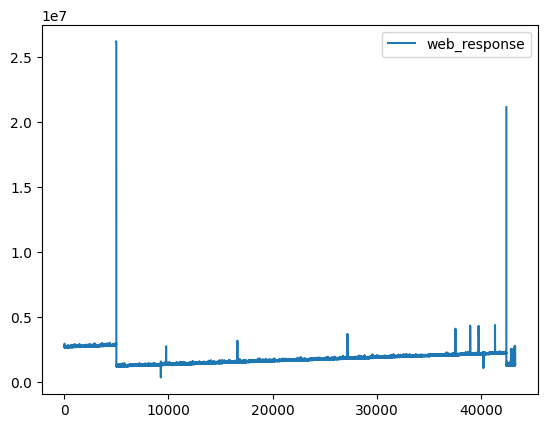

In [3]:
wr = pd.read_csv('/content/drive/MyDrive/Redlab/web_response.csv')
wr.plot(kind='line')

<Axes: >

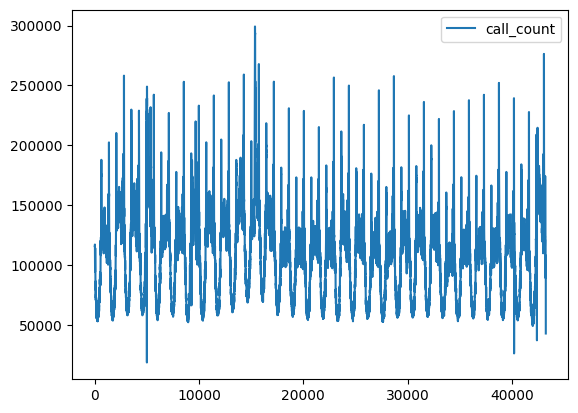

In [4]:
thp = pd.read_csv('/content/drive/MyDrive/Redlab/throughput.csv')
thp.plot(kind='line')

In [9]:
row_data = pd.read_csv('/content/drive/MyDrive/Redlab/web_response.csv')
row_data['point']= pd.to_datetime(row_data['point'])
signal = pd.DataFrame([])
signal['timestamp'] = row_data['point'].apply(lambda x: int(x.timestamp()))
signal['value']=row_data['web_response']

In [12]:
df=signal.iloc[:]
df=df.dropna()
df['value']=(df['value']-df['value'].mean())/df['value'].std()

In [13]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Пример данных
X = np.array(df['value'].values.reshape(-1,1))

# Модель Isolation Forest
clf = IsolationForest(contamination=0.1)
clf.fit(X)

# Предсказание аномалий
y_pred = clf.predict(X)
print(y_pred)

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [6]:
import plotly.express as px

fig = px.line(
    data_frame = wr,
    x = 'point',
    y='web_response'
)
fig.show()